# Logistic Regression

problem statement :

predict if a candy is chocolate or not based on its other features

https://storage.googleapis.com/kaggle-data-sets/3732/5912/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580101821&Signature=tBp735t9OPDQQvN1I27Wm3aqz8NbrCoj7i7AgA0zvKGTy8fCH4FHQHc9PbJG5p48%2FmHXeOJrD2mcFb8rtV5A7UVhH%2B%2FNhweIk8dMUhrMZLWWOg%2FlcyQCZXLWIJubB%2Br%2FNdfBKTEXBR%2FHcmmeU9pX4X%2BfcduT2m3YTG11hTTD0xR9cMmnTHibeJYgb9TOWqs4ZmCrnLj54Y%2BqtdTqsQSVF3OkrXPHsRmH%2F05eHGD%2BWcHKNcFAazpLi7kEFFpxVVWGw1KKIjOMcBWKaICeWNp8Op1An%2FecVEQ05UhrJ26eXvCkGLN%2BkKAsdjv4XW05zg1Up0Kj8gWqO9H%2BrAEXZ7lXPw%3D%3D&response-content-disposition=attachment%3B+filename%3Dthe-ultimate-halloween-candy-power-ranking.zip

In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

#loading data set
data_set = pd.read_csv("candy-data.csv")
data_set.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


# data pre-processing

In [2]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [3]:
data_set.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


##### looking at column wise probabilities

In [4]:
data_set.groupby('competitorname').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519


In [5]:
data_set.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [6]:
data_set.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.770833,0.083333,0.041667,0.020833,0.000000,0.291667,0.020833,0.666667,0.452937,0.343021,42.142257
1,0.027027,0.270270,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529


In [7]:
data_set.groupby('fruity').mean()

,chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
fruity,,,,,,,,,,,
0,0.765957,0.276596,0.297872,0.148936,0.148936,0.042553,0.446809,0.382979,0.487340,0.578957,55.327122
1,0.026316,0.026316,0.000000,0.000000,0.000000,0.342105,0.000000,0.684211,0.467895,0.332737,44.119741


In [8]:
data_set.groupby('caramel').mean()

,chocolate,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
caramel,,,,,,,,,,,
0,0.380282,0.521127,0.154930,0.042254,0.056338,0.197183,0.183099,0.577465,0.450944,0.436803,48.930538
1,0.714286,0.071429,0.214286,0.285714,0.214286,0.071429,0.571429,0.214286,0.619143,0.631571,57.346908


In [9]:
data_set.groupby('peanutyalmondy').mean()

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
peanutyalmondy,,,,,,,,,,,
0,0.352113,0.535211,0.154930,0.056338,0.084507,0.211268,0.197183,0.563380,0.467676,0.429887,47.678380
1,0.857143,0.000000,0.214286,0.214286,0.071429,0.000000,0.500000,0.285714,0.534286,0.666643,63.697137


In [10]:
data_set.groupby('nougat').mean()

,chocolate,fruity,caramel,peanutyalmondy,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
nougat,,,,,,,,,,,
0,0.397436,0.487179,0.128205,0.141026,0.089744,0.192308,0.179487,0.564103,0.468282,0.455846,49.443100
1,0.857143,0.000000,0.571429,0.428571,0.000000,0.000000,1.000000,0.000000,0.594143,0.614143,60.051879


In [11]:
data_set.groupby('crispedricewafer').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
crispedricewafer,,,,,,,,,,,
0,0.384615,0.487179,0.141026,0.166667,0.089744,0.192308,0.192308,0.551282,0.472756,0.440949,48.894015
1,1.000000,0.000000,0.428571,0.142857,0.000000,0.000000,0.857143,0.142857,0.544286,0.780143,66.170252


In [12]:
data_set.groupby('hard').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,bar,pluribus,sugarpercent,pricepercent,winpercent
hard,,,,,,,,,,,
0,0.514286,0.357143,0.185714,0.2,0.1,0.1,0.3,0.514286,0.4667,0.501014,52.418431
1,0.066667,0.866667,0.066667,0.0,0.0,0.0,0.0,0.533333,0.5344,0.318933,40.508982


In [13]:
data_set.groupby('bar').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,winpercent
bar,,,,,,,,,,,
0,0.265625,0.59375,0.093750,0.109375,0.000000,0.015625,0.234375,0.6875,0.462547,0.384531,46.714395
1,0.952381,0.00000,0.380952,0.333333,0.333333,0.285714,0.000000,0.0000,0.527714,0.725952,61.295413


In [14]:
data_set.groupby('pluribus').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,sugarpercent,pricepercent,winpercent
pluribus,,,,,,,,,,,
0,0.609756,0.292683,0.268293,0.243902,0.170732,0.146341,0.170732,0.512195,0.46539,0.533854,54.066404
1,0.272727,0.590909,0.068182,0.090909,0.000000,0.022727,0.181818,0.000000,0.49100,0.408341,46.822781


In [15]:
# deciding according to above results 
#multi - class classification problem where candy output have total 9 classes

target_data_set = pd.DataFrame(data_set[['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar']])
features_set    = pd.DataFrame(data_set[['sugarpercent','pricepercent', 'winpercent']])

In [16]:
features_set.head()

,sugarpercent,pricepercent,winpercent
0,0.732,0.860,66.971725
1,0.604,0.511,67.602936
2,0.011,0.116,32.261086
3,0.011,0.511,46.116505
4,0.906,0.511,52.341465


In [17]:
target_data_set.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar
0,1,0,1,0,0,1,0,1
1,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


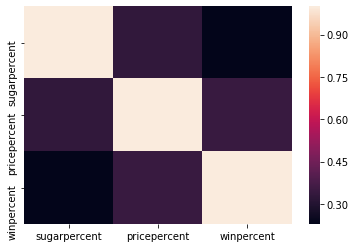

In [18]:
#plotting heat map for better evaluation of data only for numerical // feature columns
sns.heatmap(features_set.corr())

#### Splitting data set 

In [19]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train_features_values = features_set.iloc[:55,:].values
train_target_values   = target_data_set.iloc[:55,:].values
test_features_values  = features_set.iloc[55:,:].values
test_target_values    = target_data_set.iloc[55:,:].values

In [20]:
# printing shapes of obtained arrays to confirm
print("train feature values   : ",train_features_values.shape)
print("train target values   : ",train_target_values.shape)
print("test feature values   : ",test_features_values.shape)
print("test target values   : ",test_target_values.shape)

train feature values   :  (55, 3)
train target values   :  (55, 8)
test feature values   :  (30, 3)
test target values   :  (30, 8)


In [21]:
# appending a new row for theta[-zero

#ceating a new row of ones
t = np.ones(len(train_features_values)).reshape(-1,1)

#appending that in front above array
train_features_values = np.append(t,train_features_values,axis=1)

# doing same as above for test data set
t1 = np.ones(len(test_features_values)).reshape(-1,1)

test_features_values =np.append(t1,test_features_values,axis=1)

#printing shapes of numpy arrays just to confirm which will help in my calculation
print("train feature values   : ",train_features_values.shape)
print("train target values   : ",train_target_values.shape)
print("test feature values   : ",test_features_values.shape)
print("test target values   : ",test_target_values.shape)

train feature values   :  (55, 4)
train target values   :  (55, 8)
test feature values   :  (30, 4)
test target values   :  (30, 8)


In [22]:
# transposing arrays to fit it into formulae below

train_features_values = train_features_values.T
train_target_values   = train_target_values.T
test_features_values  = test_features_values.T
test_target_values    = test_target_values.T

#### making model

In [23]:
# total training records
total = len(train_features_values[0]) 

In [24]:
# defining prediction fn using sigmoid function using formula
def hypothesis_function(x_values,theta):
    return 1/(1 + np.exp(-(theta.dot(x_values))))

In [25]:
# defining derivative of cost function
def derivative_cost_function(row,i,theta):
    return (hypothesis_function(train_features_values,theta) - train_target_values[i]).dot(train_features_values[row])/total

In [26]:
#defining a function to obtain theta for each column of target
def obtain_theta(i):
    #taking number of iterations
    iterations = 1000
    
    # initialising all parameters (theta0, theta1,...theta(n)) to 0 
    theta = np.zeros(4)
    
    #taking learning rate
    alpha = 0.001
    
    #iterating to adjust theta 
    for _ in range(iterations):
        #making a copy of theta 
        theta_temp = np.copy(theta)
        
        # to obtain number of theta 
        for index in range(len(theta_temp)):
            
            # changing theta based on derivative of cost function
            theta[index] = theta_temp[index] - alpha * derivative_cost_function(index,i,theta_temp)
            
    #returninig that theta obtained       
    return theta

In [27]:
#our main method that will start training the whole model

def train_model():
    
    
    #making a list to store theta for each target variable
    thetas =[]
    
    
    #looping upto length of target variable
    for i in range(len(train_target_values)):
        
        # appending obtained theta into list
        thetas.append(obtain_theta(i))
        
    #returning list of obtained theta
    return thetas

In [28]:
# calling above method and saving theta 
thetas = train_model()

In [29]:
# printing // showing the obtained values of thetas for each column
thetas

[array([-0.1057869, -0.0365769,  0.0133159,  0.0083631]),
 array([ 0.06358008,  0.03820108, -0.01705638, -0.01474331]),
 array([-0.03767846,  0.00836849,  0.00128668, -0.0325156 ]),
 array([-0.06471269, -0.01728506,  0.00543128, -0.01707141]),
 array([-0.0314978 ,  0.00327042, -0.00031506, -0.03682017]),
 array([-0.04172529, -0.01737474,  0.00192275, -0.04187824]),
 array([ 0.00635861,  0.01901612, -0.00968073, -0.04168455]),
 array([-0.06136686, -0.01417565,  0.04344771, -0.00951831])]

#### predicting values through obtained thetas above 

In [30]:
#predicting target value based on theta obtained
def obtain_prediction(data):
    
    #storing all predicted values into list
    pred =[]
    
    #looping through columns
    for i in range(len(thetas)):
        
        # appending value to list
        pred.append(np.array(thetas[i]).dot(data))
        
    #returning the list of theta values
    return pred      

##### predicting output based on theta obtained 

In [31]:
#predicting output of train set
predicted_value_train = np.array(obtain_prediction(train_features_values))

# predicting output of test set
predicted_value_test  = np.array(obtain_prediction(test_features_values))

#printing shape of both values to do my further calculations
print("train set predicted value",predicted_value_train.shape)
print("test set predicted value",predicted_value_test.shape)

train set predicted value (8, 55)
test set predicted value (8, 30)


#### assingning 1 to maximum probability obtained through prediction and 0 to else places

In [32]:
# transposing matrices to ttake them into same shape as original target variable
predicted_value_train = predicted_value_train.T
predicted_value_test  = predicted_value_test.T

In [33]:
# finding maximum value in each row i.e. category to be assigned
interchange = np.zeros_like(predicted_value_test)
interchange[np.arange(len(predicted_value_test)),predicted_value_test.argmax(1)] = 1
predicted_value_test=interchange

In [34]:
# finding maximum value in each row i.e. category to be assigned
interchange = np.zeros_like(predicted_value_train)
interchange[np.arange(len(predicted_value_train)),predicted_value_train.argmax(1)] = 1
predicted_value_train=interchange

###### checking for accurary

In [35]:
# transposing matrices to ttake them into same shape as original target variable
predicted_value_train = predicted_value_train.T
predicted_value_test  = predicted_value_test.T

In [36]:
#checking for accuracy of build model
# function that returns accuracy using total predicting correct category
def find_accuracy(predicted_y_values, y_values):
    return (predicted_y_values==y_values).mean()*100

In [37]:
#obtaining accuracy of build model
model_accuracy =find_accuracy(predicted_value_test,test_target_values)
#printing model accuracy obtained
model_accuracy

79.87456123425122